### Visualization
---

In [5]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

### One-hot feature initialization
---

### MR
---

In [6]:
dataset = 'mr'
with open('./data/' + dataset + '_doc_vectors.txt', 'r') as f:
    doc_embed = f.readlines()

In [7]:
X = []
for s in doc_embed:
    X.append(s.split())

In [8]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(200) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (9951, 202)


In [9]:
df_test = df[df.doc_id.str.contains('test')]

In [10]:
df_test.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_190,embed_dim_191,embed_dim_192,embed_dim_193,embed_dim_194,embed_dim_195,embed_dim_196,embed_dim_197,embed_dim_198,embed_dim_199
6397,doc_test_id_6397,0,0.127027,0.000000,0.139806,0.000000,0.000000,0.195016,0.190239,0.000000,...,0.000000,0.000000,0.000000,0.0,0.140145,0.152098,0.0,0.013266,0.121763,0.089998
6398,doc_test_id_6398,0,0.002879,0.000000,0.016264,0.000000,0.040764,0.057274,0.193203,0.101658,...,0.000000,0.037991,0.060026,0.0,0.012432,0.141109,0.0,0.070440,0.000000,0.000529
6399,doc_test_id_6399,0,0.204435,0.000000,0.000000,0.000000,0.351957,0.000000,0.088150,0.000000,...,0.000000,0.173250,0.000000,0.0,0.316811,0.000000,0.0,0.000000,0.000000,0.000000
6400,doc_test_id_6400,1,0.073744,0.073000,0.002589,0.026547,0.069651,0.276865,0.000000,0.088249,...,0.254631,0.000000,0.078314,0.0,0.116133,0.232886,0.0,0.000000,0.000000,0.000000
6401,doc_test_id_6401,0,0.000000,0.066055,0.000000,0.214459,0.167746,0.032249,0.364853,0.000000,...,0.078515,0.000000,0.065090,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.068919


In [11]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [12]:
df.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_190,embed_dim_191,embed_dim_192,embed_dim_193,embed_dim_194,embed_dim_195,embed_dim_196,embed_dim_197,embed_dim_198,embed_dim_199
0,doc_test_id_6397,0,0.127027,0.000000,0.139806,0.000000,0.000000,0.195016,0.190239,0.000000,...,0.000000,0.000000,0.000000,0.0,0.140145,0.152098,0.0,0.013266,0.121763,0.089998
1,doc_test_id_6398,0,0.002879,0.000000,0.016264,0.000000,0.040764,0.057274,0.193203,0.101658,...,0.000000,0.037991,0.060026,0.0,0.012432,0.141109,0.0,0.070440,0.000000,0.000529
2,doc_test_id_6399,0,0.204435,0.000000,0.000000,0.000000,0.351957,0.000000,0.088150,0.000000,...,0.000000,0.173250,0.000000,0.0,0.316811,0.000000,0.0,0.000000,0.000000,0.000000
3,doc_test_id_6400,1,0.073744,0.073000,0.002589,0.026547,0.069651,0.276865,0.000000,0.088249,...,0.254631,0.000000,0.078314,0.0,0.116133,0.232886,0.0,0.000000,0.000000,0.000000
4,doc_test_id_6401,0,0.000000,0.066055,0.000000,0.214459,0.167746,0.032249,0.364853,0.000000,...,0.078515,0.000000,0.065090,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.068919


In [13]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [14]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.06413449 0.02574194 0.00935458]


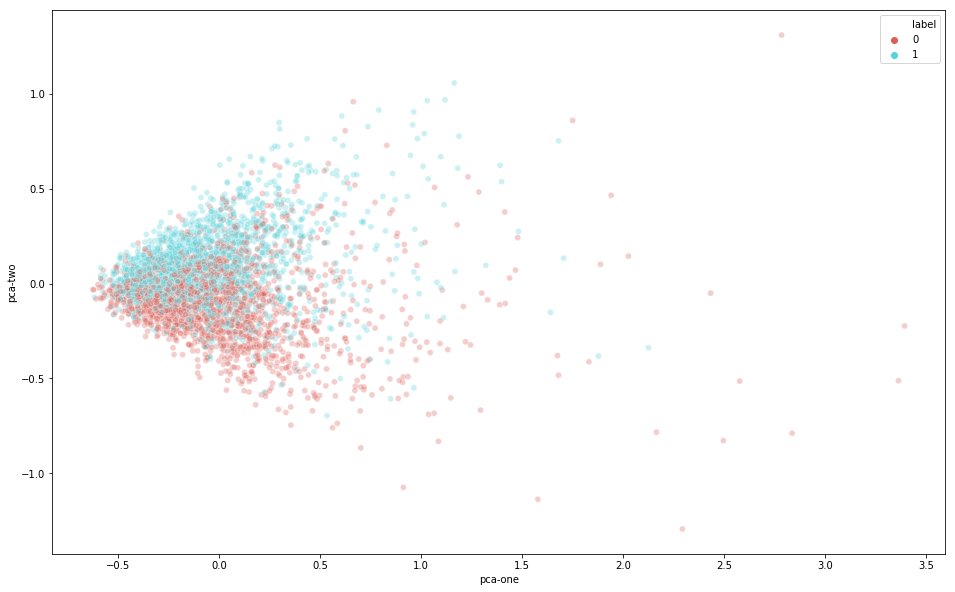

In [15]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

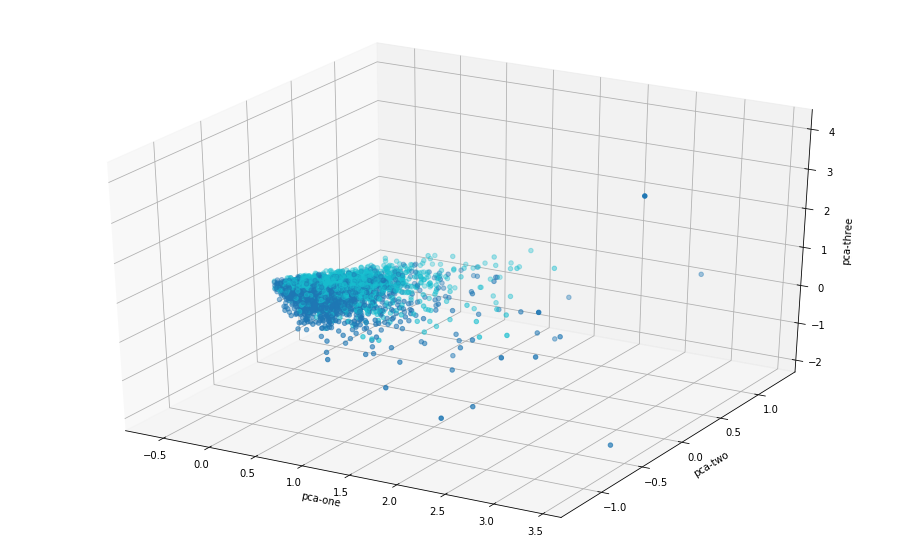

In [16]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [32]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3554 samples in 0.047s...
[t-SNE] Computed neighbors for 3554 samples in 5.068s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3554
[t-SNE] Computed conditional probabilities for sample 2000 / 3554
[t-SNE] Computed conditional probabilities for sample 3000 / 3554
[t-SNE] Computed conditional probabilities for sample 3554 / 3554
[t-SNE] Mean sigma: 0.238701
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.486519
[t-SNE] KL divergence after 300 iterations: 3.731983


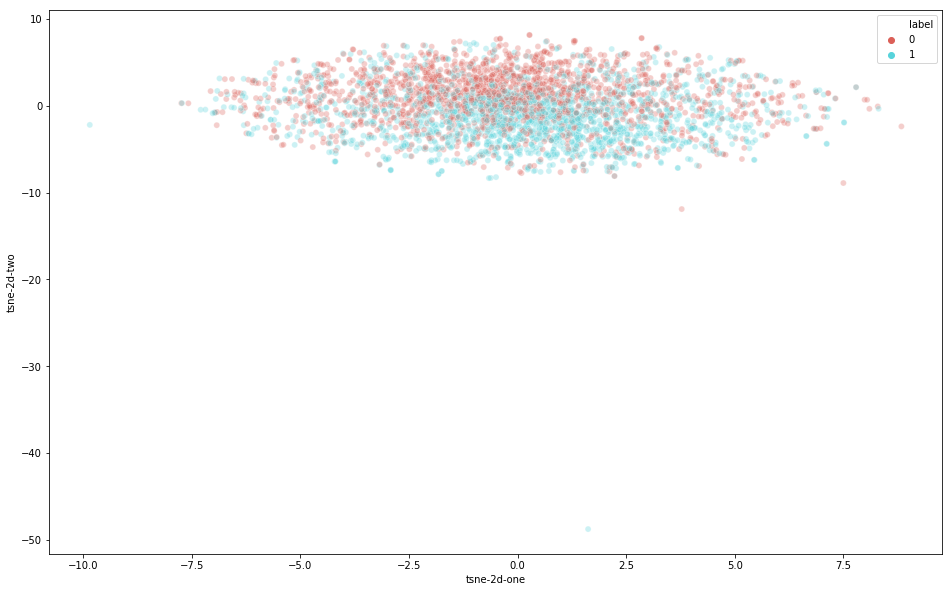

In [33]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset,
    legend="full",
    alpha=0.3
)

#### Combined

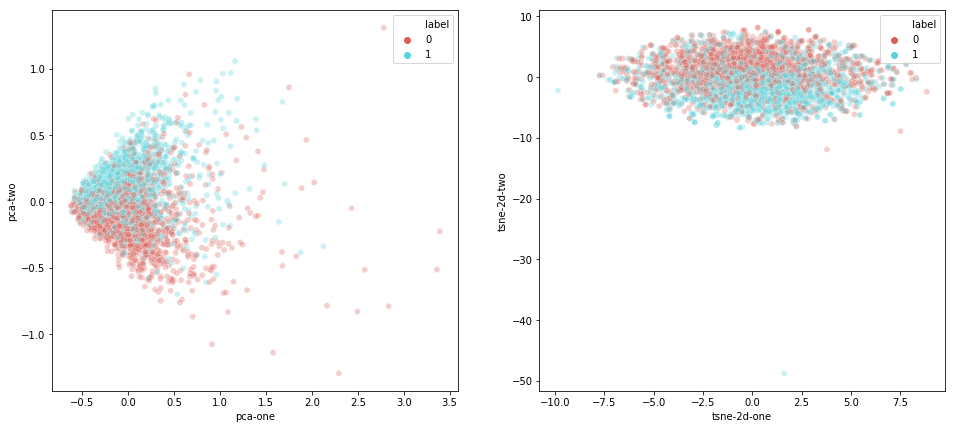

In [34]:
n_class = df_subset.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### 20ng
---

In [23]:
dataset = '20ng'
with open('./data/' + dataset + '_doc_vectors.txt', 'r') as f:
    doc_embed = f.readlines()

In [24]:
X = []
for s in doc_embed:
    X.append(s.split())

In [25]:
feat_cols = [ 'embed_dim_'+str(i) for i in range(200) ]
meta_cols = ["doc_id", "label"]
df = pd.DataFrame(X,columns=meta_cols+feat_cols)
df[feat_cols] = df[feat_cols].astype(float)
df['label'] = df['label'].apply(lambda x: int(x.split(":")[1]))
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (9951, 202)


In [26]:
df_test = df[df.doc_id.str.contains('test')]

In [27]:
df_test.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_190,embed_dim_191,embed_dim_192,embed_dim_193,embed_dim_194,embed_dim_195,embed_dim_196,embed_dim_197,embed_dim_198,embed_dim_199
6397,doc_test_id_6397,0,0.127027,0.000000,0.139806,0.000000,0.000000,0.195016,0.190239,0.000000,...,0.000000,0.000000,0.000000,0.0,0.140145,0.152098,0.0,0.013266,0.121763,0.089998
6398,doc_test_id_6398,0,0.002879,0.000000,0.016264,0.000000,0.040764,0.057274,0.193203,0.101658,...,0.000000,0.037991,0.060026,0.0,0.012432,0.141109,0.0,0.070440,0.000000,0.000529
6399,doc_test_id_6399,0,0.204435,0.000000,0.000000,0.000000,0.351957,0.000000,0.088150,0.000000,...,0.000000,0.173250,0.000000,0.0,0.316811,0.000000,0.0,0.000000,0.000000,0.000000
6400,doc_test_id_6400,1,0.073744,0.073000,0.002589,0.026547,0.069651,0.276865,0.000000,0.088249,...,0.254631,0.000000,0.078314,0.0,0.116133,0.232886,0.0,0.000000,0.000000,0.000000
6401,doc_test_id_6401,0,0.000000,0.066055,0.000000,0.214459,0.167746,0.032249,0.364853,0.000000,...,0.078515,0.000000,0.065090,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.068919


In [53]:
# Now lets only look at df_test
df = df_test.copy()
df.reset_index(drop=True, inplace=True)

#### PCA

In [54]:
df.head()

,doc_id,label,embed_dim_0,embed_dim_1,embed_dim_2,embed_dim_3,embed_dim_4,embed_dim_5,embed_dim_6,embed_dim_7,...,embed_dim_190,embed_dim_191,embed_dim_192,embed_dim_193,embed_dim_194,embed_dim_195,embed_dim_196,embed_dim_197,embed_dim_198,embed_dim_199
0,doc_test_id_6397,0,0.127027,0.000000,0.139806,0.000000,0.000000,0.195016,0.190239,0.000000,...,0.000000,0.000000,0.000000,0.0,0.140145,0.152098,0.0,0.013266,0.121763,0.089998
1,doc_test_id_6398,0,0.002879,0.000000,0.016264,0.000000,0.040764,0.057274,0.193203,0.101658,...,0.000000,0.037991,0.060026,0.0,0.012432,0.141109,0.0,0.070440,0.000000,0.000529
2,doc_test_id_6399,0,0.204435,0.000000,0.000000,0.000000,0.351957,0.000000,0.088150,0.000000,...,0.000000,0.173250,0.000000,0.0,0.316811,0.000000,0.0,0.000000,0.000000,0.000000
3,doc_test_id_6400,1,0.073744,0.073000,0.002589,0.026547,0.069651,0.276865,0.000000,0.088249,...,0.254631,0.000000,0.078314,0.0,0.116133,0.232886,0.0,0.000000,0.000000,0.000000
4,doc_test_id_6401,0,0.000000,0.066055,0.000000,0.214459,0.167746,0.032249,0.364853,0.000000,...,0.078515,0.000000,0.065090,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.068919


In [55]:
# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

In [56]:
N = min(10000, df.shape[0])
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.06413449 0.02574194 0.00935458]


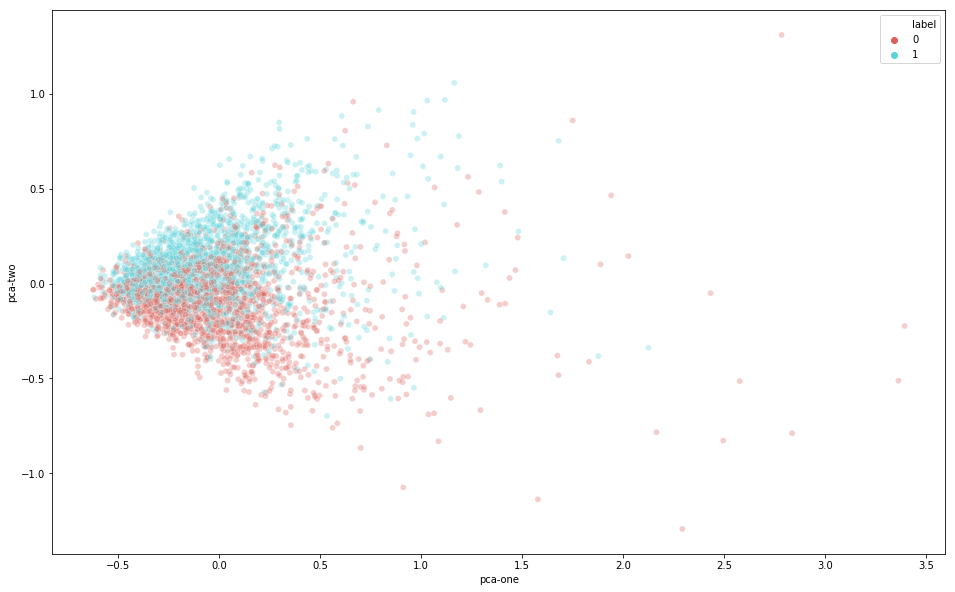

In [58]:
# 2d
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset.loc[rndperm,:],
    legend="full",
    alpha=0.3
)

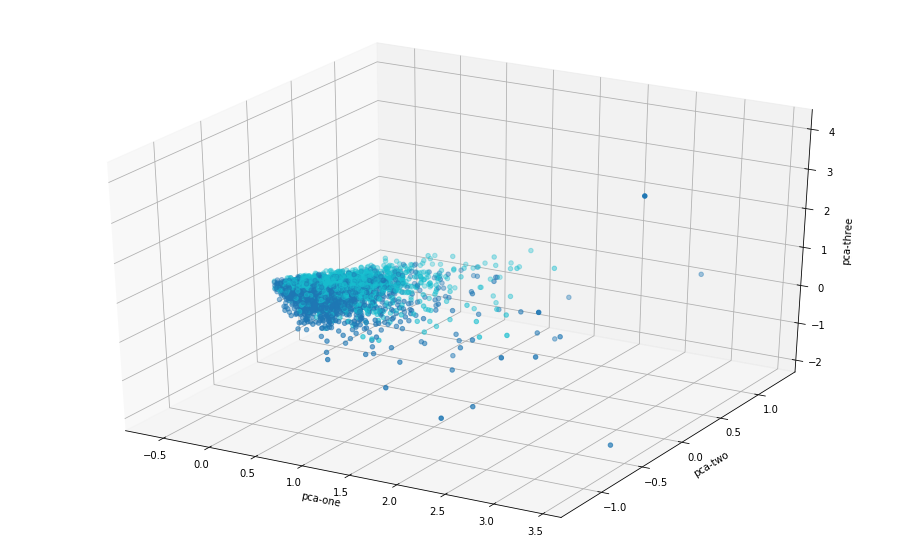

In [59]:
# 3d
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df_subset.loc[rndperm,:]["pca-one"], 
    ys=df_subset.loc[rndperm,:]["pca-two"], 
    zs=df_subset.loc[rndperm,:]["pca-three"], 
    c=df_subset.loc[rndperm,:]["label"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

#### TSNE

In [91]:
np.random.seed(42)
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=3, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 3554 samples in 0.020s...
[t-SNE] Computed neighbors for 3554 samples in 4.227s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3554
[t-SNE] Computed conditional probabilities for sample 2000 / 3554
[t-SNE] Computed conditional probabilities for sample 3000 / 3554
[t-SNE] Computed conditional probabilities for sample 3554 / 3554
[t-SNE] Mean sigma: 0.152113
[t-SNE] KL divergence after 250 iterations with early exaggeration: 125.909607
[t-SNE] KL divergence after 300 iterations: 5.032773


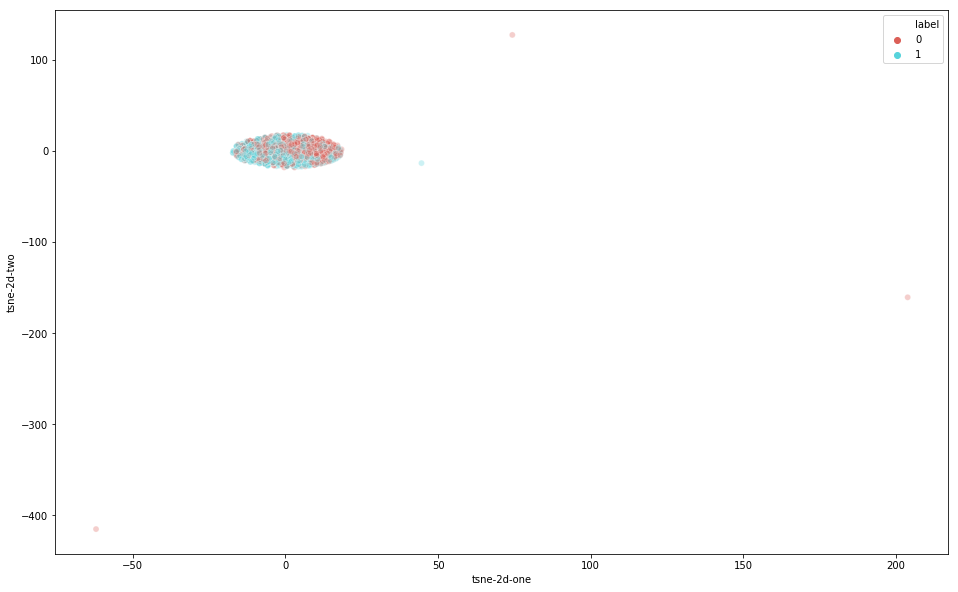

In [92]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", df_subset.label.nunique()),
    data=df_subset,
    legend="full",
    alpha=0.3
)

#### Combined

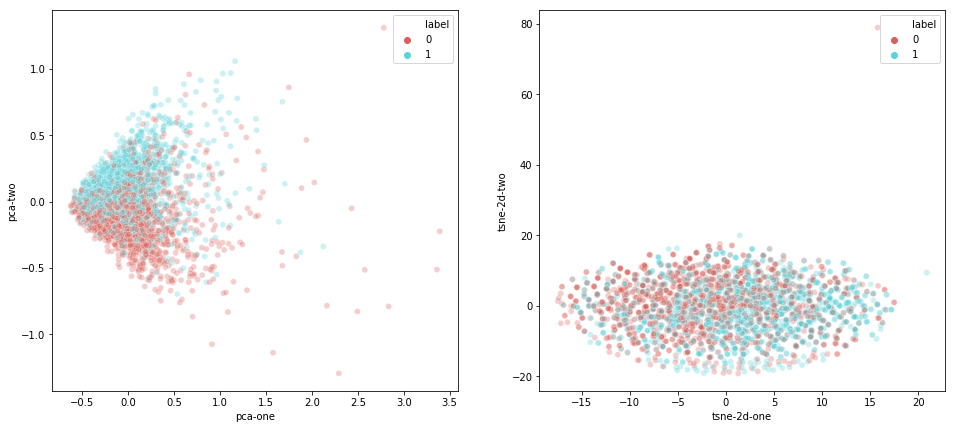

In [84]:
n_class = df_subset.label.nunique()
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", n_class),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

### Feature Dim = 300
---